# Load data from STAEformer

In [6]:
import os 
import numpy as np 
path = os.path.expanduser('~/staeformer/data/inputs_model')
print(os.listdir(path))
for input in ['x','y']:
    for training_mode in ['train','val','test']:
        for scaled in ['','_scaled']:
            locals()[f'{input}_{training_mode}'] = np.load(f'{path}/{input}_{training_mode}{scaled}.npy')


['x_train.npy', 'y_train.npy', 'x_val.npy', 'y_val.npy', 'x_test.npy', 'y_test.npy', 'x_train_scaled.npy', 'y_train_scaled.npy', 'x_val_scaled.npy', 'y_val_scaled.npy', 'x_test_scaled.npy', 'y_test_scaled.npy']


# Load data from my own framework

In [10]:
path_save = os.path.expanduser('~/prediction-validation/save/data')
inputs_names = []
for training_mode in ['train','valid','test']:
    for input in ['U','Utarget','calendar_dayofweek','calendar_timeofday','PeMS08_occupancy','PeMS08_speed']:
        inputs_names.append(f'{input}_{training_mode}')
        locals()[f'{input}_{training_mode}'] = np.load(f'{path_save}/{input}_{training_mode}.npy')
print(inputs_names)


['U_train', 'Utarget_train', 'calendar_dayofweek_train', 'calendar_timeofday_train', 'PeMS08_occupancy_train', 'PeMS08_speed_train', 'U_valid', 'Utarget_valid', 'calendar_dayofweek_valid', 'calendar_timeofday_valid', 'PeMS08_occupancy_valid', 'PeMS08_speed_valid', 'U_test', 'Utarget_test', 'calendar_dayofweek_test', 'calendar_timeofday_test', 'PeMS08_occupancy_test', 'PeMS08_speed_test']


In [20]:
x_train_perso = np.stack([U_train,PeMS08_occupancy_train,PeMS08_speed_train],axis=-1)
x_train_perso = x_train_perso.transpose(0,2,1,3)
y_train_perso = np.expand_dims(Utarget_train.transpose(0,2,1),-1)

x_train.shape,y_train.shape, x_train_perso.shape,y_train_perso.shape

((10700, 12, 170, 3),
 (10700, 12, 170, 1),
 (10699, 12, 170, 3),
 (10699, 12, 170, 1))

In [40]:
y_train_perso[:,0,0,0]/y_train[1:,0,0,0]

array([-0.02094262, -0.01727605, -0.01625799, ..., -0.02031854,
       -0.02101242, -0.01738597], dtype=float32)

# Ils semblent identique, mais pas avec la même normalisation:

<Axes: >

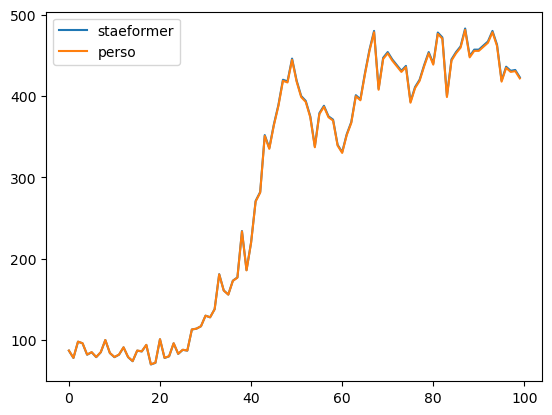

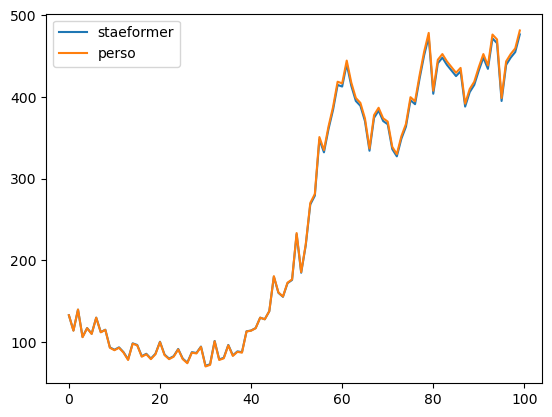

In [88]:
import pandas as pd
pd.DataFrame(dict(staeformer = y_train[:-1,0,0,0], perso = 150.5*y_train_perso[:,0,0,0]+333)).iloc[:100].plot()
pd.DataFrame(dict(staeformer = 143*x_train[:-1,0,0,0]+228, perso = 150.5*x_train_perso[:,0,0,0]+333)).iloc[:100].plot()

In [31]:
print(x_train[:100,0,0,0])
print(x_train_perso[:100,0,0,0])

[-0.6650151  -0.79548675 -0.6169466  -0.85042214 -0.77488595 -0.8229544
 -0.68561584 -0.8092206  -0.7886198  -0.93969226 -0.960293   -0.93969226
 -0.9808938  -1.0426961  -0.9053576  -0.91909146 -1.0152285  -0.99462765
 -1.0358292  -0.99462765 -0.89162374 -1.0014946  -1.0358292  -1.0152285
 -0.9534261  -1.0358292  -1.0701638  -0.9808938  -0.9877607  -0.9328253
 -1.0976316  -1.0838977  -0.8847568  -1.0426961  -1.0289623  -0.91909146
 -1.0083616  -0.97402686 -0.9808938  -0.8023537  -0.79548675 -0.77488595
 -0.68561584 -0.6993497  -0.63068044 -0.3354025  -0.47274107 -0.5070757
 -0.3903379  -0.3628702   0.02854476 -0.30106783 -0.06759225  0.28262115
  0.35815737  0.8388424   0.72897154  0.92811245  1.0929188   1.3057935
  1.2920597   1.4843338   1.2989266   1.168455    1.1272534   0.99678177
  0.7427054   1.0242494   1.0860518   0.99678177  0.96931404  0.75643927
  0.6946369   0.8457093   0.94871324  1.1753219   1.1409873   1.360729
  1.5598699   1.7178093   1.2302574   1.4912007   1.539269